## Contrast Limited Adaptive Histogram Equalization (CLAHE)

### X-Ray images

cv2 is OpenCV interface for working with image and video processing \
os is functions to work with Operating System

In [1]:
import cv2 
import os 

'''
    Function definition for apply CLAHE to jpg image
    clip_limit=... -> threshold parameter for the contrast limiting, higher is more contrast
'''
def apply_clahe(image_path, output_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    try:
        # Grayscale mode, no need for color in this example of X-Ray images
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Catches if there is no image to read
        if img is None:
            raise ValueError(f"Unable to read image {image_path}")

        # CLAHE object from cv2
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        
        # Apply CLAHE
        clahe_img = clahe.apply(img)
        
        # Writes the enhanced image
        cv2.imwrite(output_path, clahe_img)
        
    # Catches if the CLAHE process failed    
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")
        
'''
    Function definition for outputting CLAHE images to separate files
    This allows the original images to still exist
'''
def clahe_to_folder(input_dir, output_dir, clip_limit=2.0, tile_grid_size=(8, 8)):
    
    # If directory doesn't exist, create it
    os.makedirs(output_dir, exist_ok=True)

    # Collects all the jpg files in directory
    image_files = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]
    
    # Processes jpg images one-by-one
    for f in image_files:
        input_path = os.path.join(input_dir, f)
        output_path = os.path.join(output_dir, f)
        apply_clahe(input_path, output_path, clip_limit, tile_grid_size)

Performs CLAHE on input directory and outputs to output directory

In [2]:
input_directory = 'x_ray'  # Update this path to your folder
output_directory = 'x_ray_clahe'  # Update this path to your folder
clahe_to_folder(input_directory, output_directory)
print("Finished")

Finished


Function to display the images 

In [3]:
import matplotlib.pyplot as plt

def display(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg')]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Unable to read image {image_path}")
            continue        
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

X-ray images before CLAHE

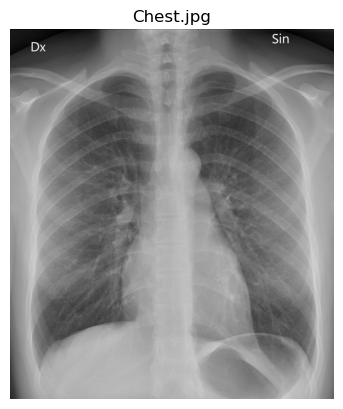

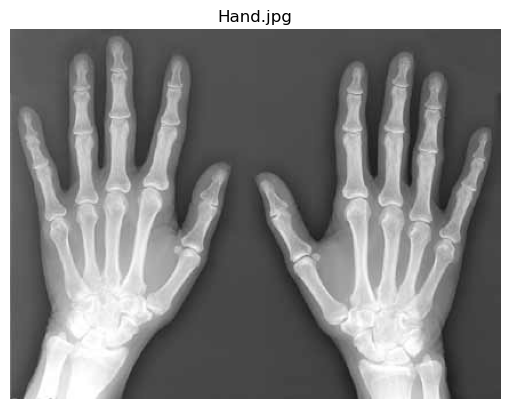

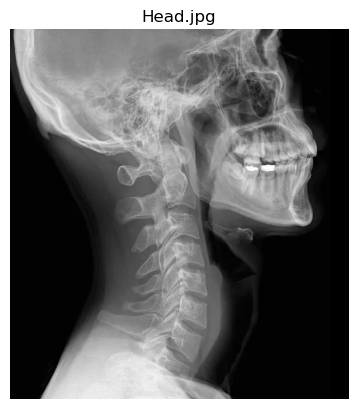

In [4]:
x_ray = 'x_ray'
display(x_ray)

X-ray images after CLAHE

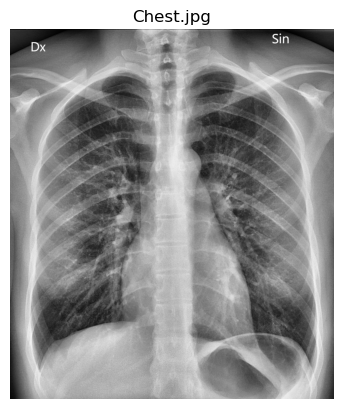

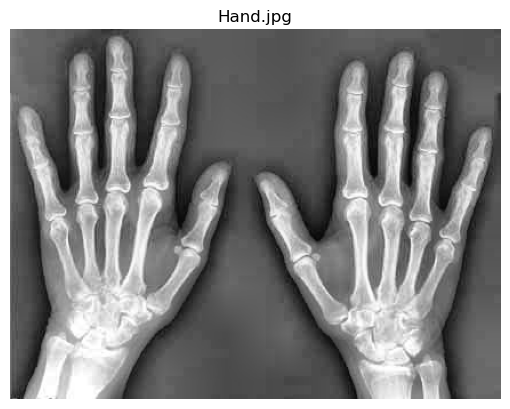

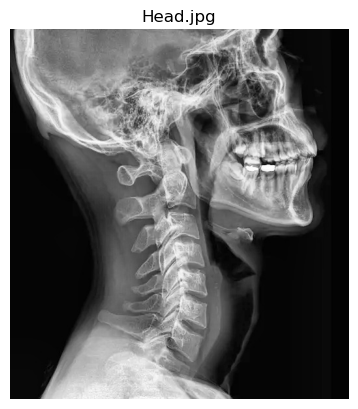

In [5]:
x_ray_clahe = 'x_ray_clahe'
display(x_ray_clahe)